<a href="https://colab.research.google.com/github/mahalaxmy/ANN/blob/main/DL1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
df=pd.read_csv("carsales.csv")


In [ ]:
df

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [ ]:
df.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Make           951 non-null    object 
 1   Colour         950 non-null    object 
 2   Odometer (KM)  950 non-null    float64
 3   Doors          950 non-null    float64
 4   Price          950 non-null    float64
dtypes: float64(3), object(2)
memory usage: 39.2+ KB


In [ ]:
df.describe()

,Odometer (KM),Doors,Price
count,950.000000,950.000000,950.000000
mean,131253.237895,4.011579,16042.814737
std,69094.857187,0.382539,8581.695036
min,10148.000000,3.000000,2796.000000
25%,70391.250000,4.000000,9529.250000
50%,131821.000000,4.000000,14297.000000
75%,192668.500000,4.000000,20806.250000
max,249860.000000,5.000000,52458.000000


In [ ]:
df.isna()

,Make,Colour,Odometer (KM),Doors,Price
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
995,False,False,False,False,False
996,True,False,False,False,False
997,False,False,False,False,False
998,False,False,False,False,False


In [ ]:
df.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [ ]:
df.mean()

<ipython-input-57-c61f0c8f89b5>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.mean()


Odometer (KM)    131253.237895
Doors                 4.011579
Price             16042.814737
dtype: float64

In [ ]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [ ]:
df.Make.unique()

array(['Honda', 'BMW', 'Toyota', 'Nissan', nan], dtype=object)

In [ ]:
df.ffill(axis = 0)
# Fill across the row
df.bfill(axis ='rows')


,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,Nissan,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(X[:, 2:3])
X[:, 2:3] = imputer.transform(X[:, 2:3])

In [ ]:
y=df["Price"]=df["Price"].fillna(df["Price"].mean())

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ct = ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[1])],remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [ ]:
X

array([[1.0, 0.0, 1.0, ..., 'Honda', 35431.0, 4.0],
       [0.0, 1.0, 0.0, ..., 'BMW', 192714.0, 5.0],
       [1.0, 0.0, 1.0, ..., 'Honda', 84714.0, 4.0],
       ...,
       [0.0, 1.0, 0.0, ..., 'Nissan', 66604.0, 4.0],
       [1.0, 0.0, 1.0, ..., 'Honda', 215883.0, 4.0],
       [0.0, 1.0, 0.0, ..., 'Toyota', 248360.0, 4.0]], dtype=object)

<Axes: >

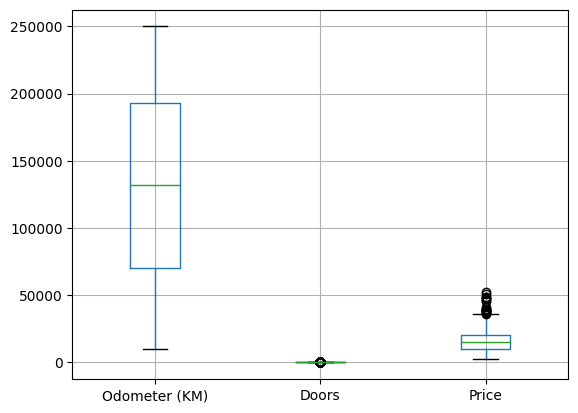

In [ ]:
   df.boxplot()

In [ ]:
percentile25 = df['Price'].quantile(0.25)
percentile75 = df['Price'].quantile(0.75)
iqr=percentile75-percentile25

In [ ]:
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

In [ ]:
df[df['Price'] > upper_limit]
df[df['Price'] < lower_limit]

,Make,Colour,Odometer (KM),Doors,Price


In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit_transform()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.7, random_state = 1)

In [ ]:
X_train

array([[0.0, 1.0, 0.0, ..., 'Toyota', 232912.0, 4.0],
       [1.0, 0.0, 1.0, ..., 'Toyota', 86480.0, 4.0],
       [1.0, 0.0, 1.0, ..., 'Honda', 225600.0, 4.0],
       ...,
       [1.0, 0.0, 1.0, ..., 'Nissan', 131253.23789473684, 3.0],
       [1.0, 0.0, 1.0, ..., 'Toyota', 131253.23789473684, 4.0],
       [1.0, 0.0, 1.0, ..., 'Nissan', 131253.23789473684, 4.0]],
      dtype=object)

In [ ]:
y_train

326     6029.000000
458    16319.000000
681    16042.814737
662    16042.814737
762    16645.000000
           ...     
767    21679.000000
72      5648.000000
908    15861.000000
235    19936.000000
37     15131.000000
Name: Price, Length: 300, dtype: float64

SCALARS

In [1]:
 import numpy as np
 x = np.array(10)

In [2]:
x

array(10)

In [3]:
x.ndim

0

VECTORS

In [4]:
 y = np.array([12, 3, 6, 14, 8])

In [5]:
y

array([12,  3,  6, 14,  8])

In [6]:
 y.ndim

1

MATRICS

In [7]:
Z = np.array([[5, 8, 2, 34, 0],
[6, 79, 30, 35, 1],
[9, 80, 49, 6, 2]])

In [9]:
  Z.ndim

2

3D TENSORS

In [10]:
a= np.array([[[5, 8, 20, 34, 0],
[6, 7, 3, 5, 1],
[7, 80, 4, 36, 2]],
[[5, 7, 2, 34, 0],
[6, 79, 3, 35, 1],
[7, 8, 4, 36, 2]],
[[5, 78, 2, 3, 0],
[6, 19, 3, 3, 1],
[7, 8, 4, 36, 24]]])

In [13]:
a.ndim

3